In [1]:
import ramanchada2 as rc2
import matplotlib.pyplot as plt

<Axes: >

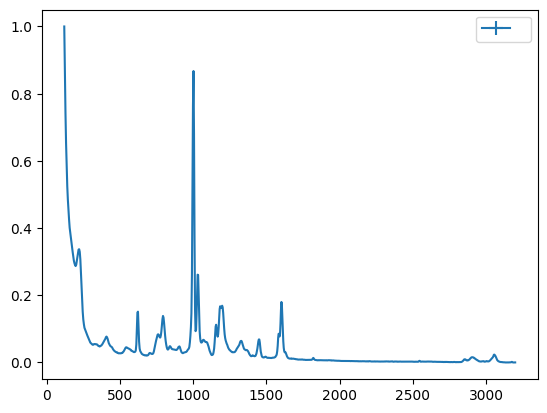

In [2]:
spe = rc2.spectrum.from_test_spe(sample=['PST'], provider=['FNMT'], OP=['01'], laser_wl=['785'])
spe = spe.normalize()
spe.plot()

(-0.1, 0.5)

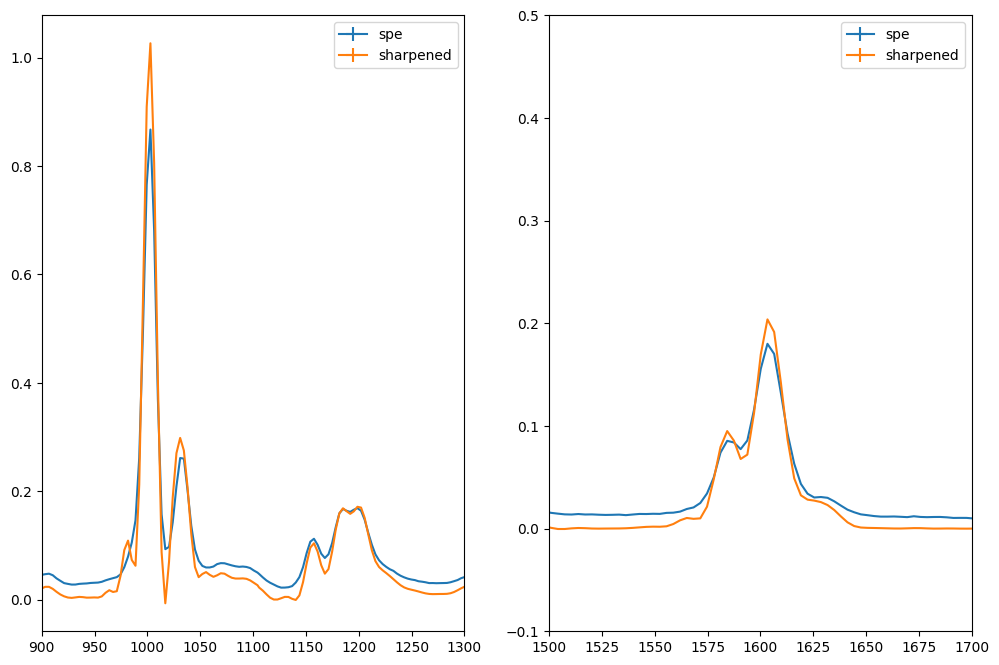

In [3]:
kw_sharpening = dict(filter_fraction=1, sig_width=.4, der2_factor=0, der4_factor=.1)
sharpened = spe.subtract_moving_minimum(60).normalize().derivative_sharpening(**kw_sharpening)

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
for a in ax:
    spe.plot(ax=a, label='spe')
    sharpened.plot(ax=a, label='sharpened')
ax[0].set_xlim(900, 1300)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .5)

In [4]:
peak_candidates = spe.find_peak_multipeak(sharpening='hht', strategy='topo')

<Axes: >

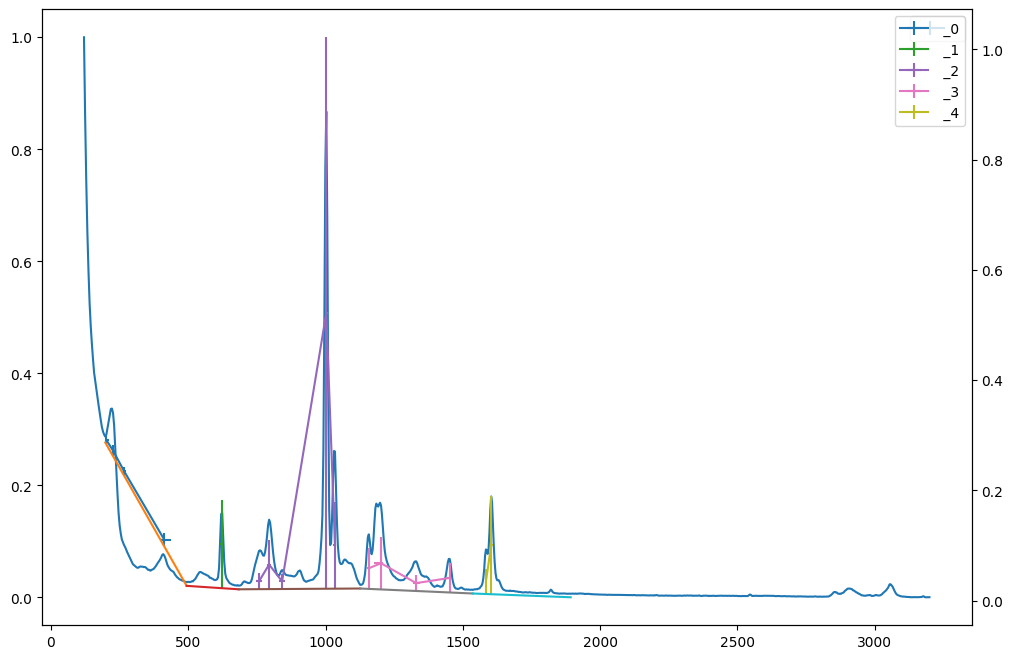

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
peak_candidates.plot(ax=ax.twinx())
spe.plot(ax=ax)

d:\nina\src\charisma\ramanchada2\src\ramanchada2\misc\plottable.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


<Axes: >

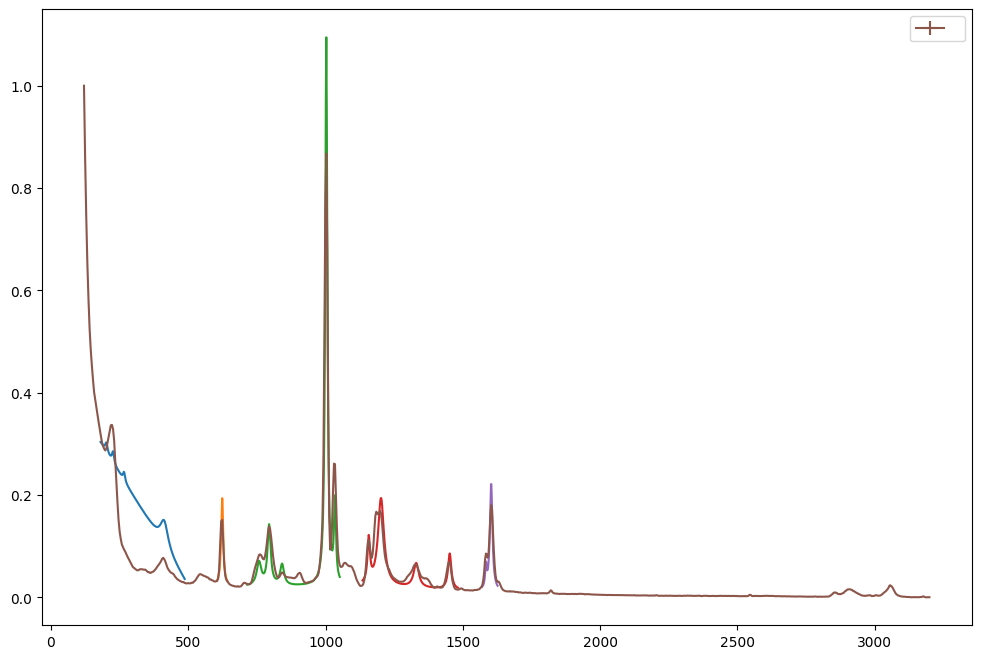

In [6]:
fitres = spe.fit_peak_multimodel(profile='Moffat', candidates=peak_candidates, no_fit=True)
fig, ax = plt.subplots(figsize=(12, 8))
fitres.plot(ax=ax, individual_peaks=False)
spe.plot(ax=ax)


In [7]:
fitres = spe.fit_peak_multimodel(profile='Moffat', candidates=peak_candidates, no_fit=False)

<Axes: >

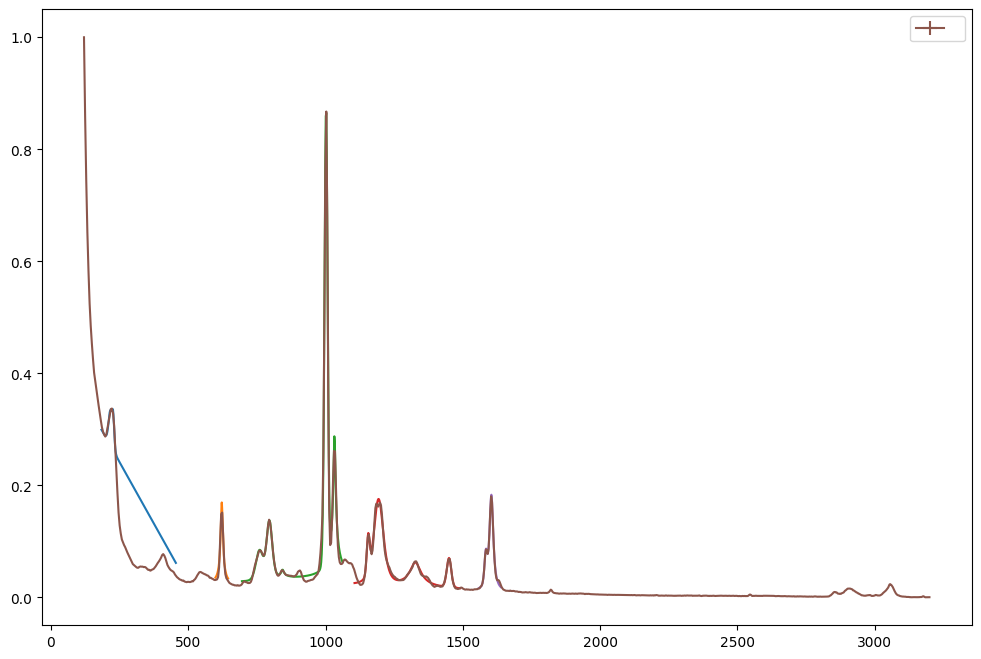

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
fitres.plot(ax=ax, individual_peaks=False)
spe.plot(ax=ax)


<Axes: >

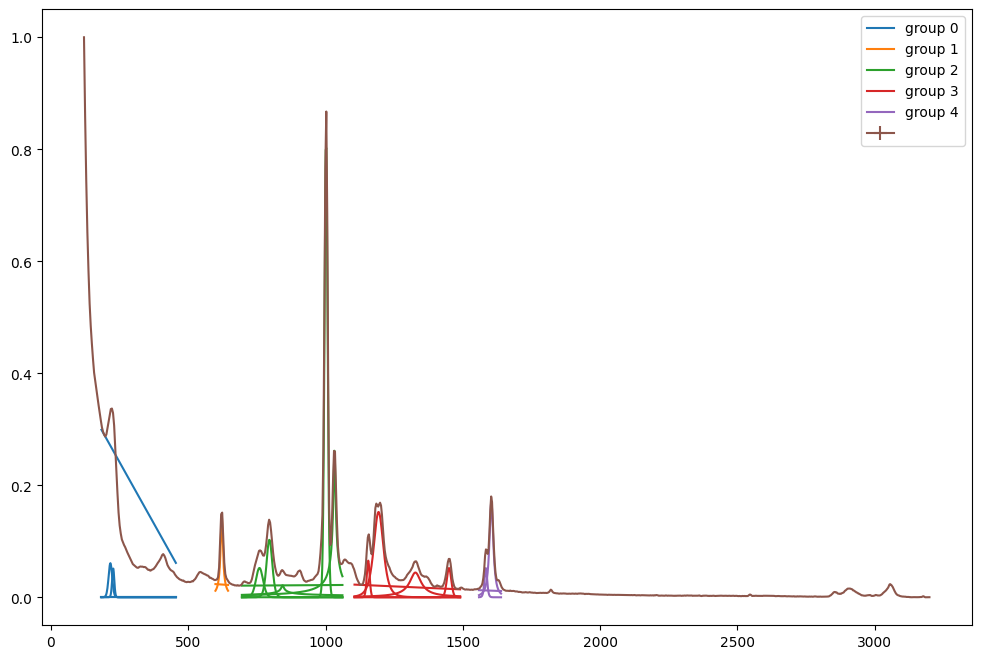

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
fitres.plot(ax=ax, individual_peaks=True)
spe.plot(ax=ax)